In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calibration_08302023 as cal
import sys
sys.path.append('../../')
from utils import *
from fears.utils import AutoRate

rfu30_to_dilution = cal.run()

data_file = '../experiment_data/DNase_exp_01282024.xlsx'

ab_folder = '../experiment_data/DNase_exp_ab_01282024'

df = pd.read_excel(data_file, header=0)
df['Cell count 10^4'] = df['Cell count 10^4']*10**4/50
df['Cell count 10^5'] = df['Cell count 10^5']*10**5/50

df['mean'] = df[['Cell count 10^4','Cell count 10^5']].mean(axis=1)

In [22]:
df

,Time,Cell count 10^4,Cell count 10^5,DNase,mean
0,0,71800.0,86000.0,pos,78900.0
1,180,1800.0,0.0,pos,900.0
2,0,67000.0,66000.0,neg,66500.0
3,180,400.0,0.0,neg,200.0


In [24]:
files = os.listdir(ab_folder)
files = [f for f in files if f.endswith('.xlsx')
         and not f.startswith('.')]
files.sort(key=natural_keys)

replicates = ['D','E','F']

cols = ['2','3']

rfu_dict = {'mean':[],
            'err':[]}
cell_count_dict = {'mean':[],
                   'err':[],
                   'log_mean':[],
                   'log_err':[]}

time_list = []

for i,col in enumerate(cols):
    file = files[i]
    file_path = os.path.join(ab_folder,file)
    p = AutoRate.Plate(file_path,mode='single_measurement')
    data = p.od_data_to_dict(p.data)

    time_list.append(p.get_start_time())

    rfu_t = []
    for row in replicates:
        key = row+col
        print(key)
        rfu_t.append(data[key])
    
    cell_count_t = rfu30_to_dilution(rfu_t,background_subtracted=False)

    cell_count_log = np.log10(cell_count_t)

    rfu_dict['mean'].append(np.mean(rfu_t))
    rfu_dict['err'].append(np.std(rfu_t)/np.sqrt(len(rfu_t)))
    cell_count_dict['mean'].append(np.mean(cell_count_t))
    cell_count_dict['err'].append(np.std(cell_count_t)/np.sqrt(len(cell_count_t)))
    cell_count_dict['log_mean'].append(np.mean(cell_count_log))
    cell_count_dict['log_err'].append(np.std(cell_count_log)/np.sqrt(len(cell_count_log)))

time = []

t0 = time_list[0]
for t in time_list:
    time.append((t-t0).total_seconds()/60)

time = np.array(time)

D2
E2
F2
D3
E3
F3


In [23]:
rfu_dict

{'mean': [3300.6666666666665, 2004.3333333333333],
 'err': [52.673698546034515, 56.95287200510287]}

<ErrorbarContainer object of 3 artists>

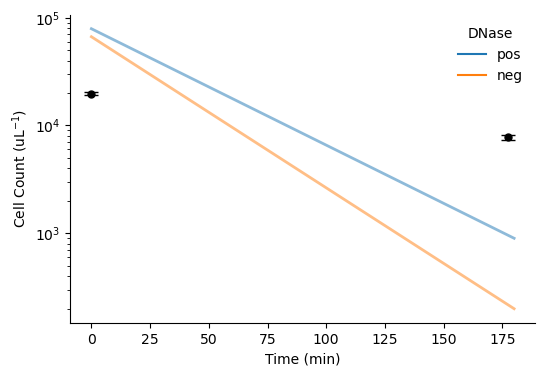

In [20]:
fig,ax = plt.subplots(figsize=(6,4))

s = 40

# ax = sns.scatterplot(y='Cell count 10^4', x='Time', data=df, hue='DNase', legend=True, ax=ax,s=s)
# ax = sns.scatterplot(y='Cell count 10^5', x='Time', data=df, hue='DNase', legend=True, ax=ax,s=s)

ax = sns.lineplot(y='mean', x='Time', data=df, hue='DNase', ax=ax, alpha=0.5,linewidth=2)

ax.set_yscale('log')

# only plot unique legend entries

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=False,title='DNase')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Time (min)')
ax.set_ylabel('Cell Count (uL$^{-1}$)')

ax.errorbar(time,cell_count_dict['mean'],yerr=cell_count_dict['err'],fmt='o',color='k',capsize=5,markersize=5)


In [21]:
cell_count_dict

{'mean': [19722.546027179542, 7755.3485750807895],
 'err': [696.5644979263042, 364.09100120423733],
 'log_mean': [4.294160586597445, 3.8881034009882462],
 'log_err': [0.015193264272936683, 0.021041181535256737]}